In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.graph_objects as go
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [3]:
import cufflinks as cf
cf.go_offline()

In [4]:
df=pd.read_excel('carona cases.csv.xlsx')

In [5]:
df.head(1)

,CODE,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious,Critical",Tot Cases 1m pop,Deaths 1M pop,Total Tests,Tests 1M pop,Population
0,USA,USA,1859323,NaN,106925.0,NaN,615416.0,1136982.0,16949.0,5620.0,323.0,18150053.0,54859.0,330848770


In [6]:
df.isna().sum()

CODE                 10
Country               0
Total Cases           0
New Cases           209
Total Deaths         30
New Deaths          210
Total Recovered       3
Active Cases          2
Serious,Critical     86
Tot Cases 1m pop      2
Deaths 1M pop        32
Total Tests          25
Tests 1M pop         25
Population            0
dtype: int64

In [7]:
df.fillna(value=0,inplace=True)
df.isna().sum()

CODE                0
Country             0
Total Cases         0
New Cases           0
Total Deaths        0
New Deaths          0
Total Recovered     0
Active Cases        0
Serious,Critical    0
Tot Cases 1m pop    0
Deaths 1M pop       0
Total Tests         0
Tests 1M pop        0
Population          0
dtype: int64

In [8]:
data=dict(type='choropleth',
         locations=df['CODE' ],          
         z=df['Total Cases'],
         text=df['Country'],
           marker_line_width=1.0,
         colorbar={'title':'covid-19 cases'},
         )

In [9]:
layout=dict(title='2020 carona cases',
           geo=dict(showframe=False,
                   projection={'type':'mercator'}
                   ))

In [10]:
choromap=go.Figure(data=[data],layout=layout)


In [11]:
iplot(choromap)

In [12]:
df.iplot()

In [13]:
df1=pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)

In [14]:
df1

,CODE,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious,Critical",Tot Cases 1m pop,Deaths 1M pop,Total Tests,Tests 1M pop,Population
0,189,203,200,0,117,0,186,167,67,185,74,190,154,211
1,26,26,199,0,114,0,185,166,65,158,65,173,65,208
2,151,160,198,0,104,0,183,165,63,162,40,189,168,205
3,57,182,197,0,112,0,184,161,55,187,82,187,172,184
4,186,202,196,0,116,0,0,1,61,177,81,188,163,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,135,37,4,0,0,0,5,1,0,88,0,13,106,7
211,154,184,3,0,0,0,4,1,0,118,0,4,99,5
212,4,5,2,0,0,0,3,1,0,68,0,1,48,6
213,109,111,1,0,0,0,1,2,0,1,0,9,4,70


In [15]:
df1.iplot(x='Total Cases',y='Total Deaths',kind='bar')

In [16]:
df2=df1

In [17]:
df2

,CODE,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious,Critical",Tot Cases 1m pop,Deaths 1M pop,Total Tests,Tests 1M pop,Population
0,189,203,200,0,117,0,186,167,67,185,74,190,154,211
1,26,26,199,0,114,0,185,166,65,158,65,173,65,208
2,151,160,198,0,104,0,183,165,63,162,40,189,168,205
3,57,182,197,0,112,0,184,161,55,187,82,187,172,184
4,186,202,196,0,116,0,0,1,61,177,81,188,163,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,135,37,4,0,0,0,5,1,0,88,0,13,106,7
211,154,184,3,0,0,0,4,1,0,118,0,4,99,5
212,4,5,2,0,0,0,3,1,0,68,0,1,48,6
213,109,111,1,0,0,0,1,2,0,1,0,9,4,70


In [18]:
df2.drop(['CODE','Country','Tot Cases 1m pop','Deaths 1M pop','Tests 1M pop','Population'],axis=1,inplace=True)
df2

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious,Critical",Total Tests
0,200,0,117,0,186,167,67,190
1,199,0,114,0,185,166,65,173
2,198,0,104,0,183,165,63,189
3,197,0,112,0,184,161,55,187
4,196,0,116,0,0,1,61,188
...,...,...,...,...,...,...,...,...
210,4,0,0,0,5,1,0,13
211,3,0,0,0,4,1,0,4
212,2,0,0,0,3,1,0,1
213,1,0,0,0,1,2,0,9


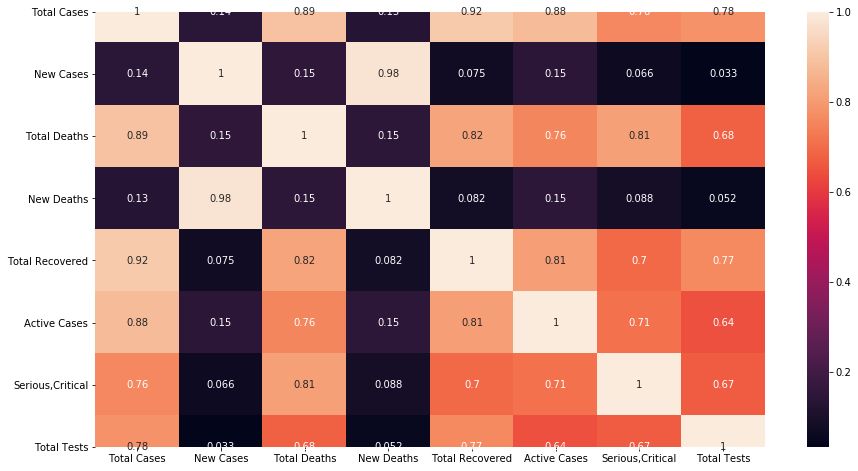

In [19]:
import seaborn as sns
corr = df1.corr()
plt.figure(figsize=(15,8))

# plot the heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [20]:

X=df2.drop(['New Cases'],axis=1)

y=df2['New Cases']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.4, random_state=5)

In [23]:
y_train.shape

(129,)

In [24]:
def logisticalgo(X_train,y_train,cond,new_observation):
    print(cond)
    from sklearn.linear_model import LogisticRegression

    clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
    model = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    from sklearn.metrics import classification_report, confusion_matrix
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    from sklearn import metrics
    mlw=metrics.accuracy_score(y_test, y_pred)
    print("ACCURACY")
    print(mlw)
    print("Prediction")
    print(model.predict(new_observation))
    
    return(mlw)


In [25]:
def nbs(X_train,y_train,cond,new_observation):
    print(cond)
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    model1=clf.fit(X_train, y_train)
   # model1.predict(new_observation)
    y_pred = model1.predict(X_test)
    from sklearn.metrics import classification_report, confusion_matrix
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    from sklearn import metrics
    nbw=metrics.accuracy_score(y_test, y_pred)
    print("ACCURACY")
    print(nbw)
    
    
    print("Prediction")
    print(model1.predict(new_observation))
    return(nbw)

    

In [26]:
def randomforest(X_train,y_train,cond,new_observation):
    print(cond)
    from sklearn.ensemble import RandomForestClassifier
    clf=RandomForestClassifier(n_estimators=100)
   
    model2=clf.fit(X_train, y_train)         # fit means prediction
   # model1.predict(new_observation)
    y_pred = model2.predict(X_test)
    from sklearn.metrics import classification_report, confusion_matrix
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    from sklearn import metrics
    rfw=metrics.accuracy_score(y_test, y_pred)
    print("ACCURACY")
    print(rfw)
    
    
    print("Prediction")
    print(model2.predict(new_observation))
   
    return(rfw)

  

In [27]:
def knnalgo(X_train,y_train,cond,new_observation):
    print(cond)
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=12)
    model3=knn.fit(X_train, y_train)
    
   # model1.predict(new_observation)
    y_pred = model3.predict(X_test)
    from sklearn.metrics import classification_report, confusion_matrix
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    from sklearn import metrics
    knw=metrics.accuracy_score(y_test, y_pred)
    print("ACCURACY")
    print(knw)
    
   
    print("Prediction")
    print(model3.predict(new_observation))
    return(knw)


In [28]:
def dtree(X_train,y_train,cond,new_observation):
    print(cond)
    from sklearn.tree import DecisionTreeClassifier 
    dnn = DecisionTreeClassifier()
    model4=dnn.fit(X_train, y_train)
    
   # model1.predict(new_observation)
    y_pred = model4.predict(X_test)
    from sklearn.metrics import classification_report, confusion_matrix
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    from sklearn import metrics
    dnw=metrics.accuracy_score(y_test, y_pred)
    print("ACCURACY")
    print(dnw)
    
   
    print("Prediction")
    print(model4.predict(new_observation))
    return(dnw)


In [32]:
print("LOGISTIC ALGORITHM")
mlw=logisticalgo(X_train,y_train,"New Cases",[[730,402,0,4,23,1,0]])
print("NAIVYE BAYES  ALGORITHM")
nbw=nbs(X_train,y_train,"New Cases",[[730,402,0,4,23,1,0]])
print("RANDOM FOREST ALGORITHM")
rfw=randomforest(X_train,y_train,"New Cases",[[730,402,0,4,23,1,0]])
print("KNN ALGORITHM")
knw=knnalgo(X_train,y_train,"New Cases",[[730,402,0,4,23,1,0]])
print("DTREE")
dnw=dtree(X_train,y_train,"New Cases",[[730,402,0,4,23,1,0]])


LOGISTIC ALGORITHM
New Cases


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



CONFUSION MATRIX
[[80  2  0  2  1]
 [ 0  0  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        85
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.93        86
   macro avg       0.20      0.19      0.19        86
weighted avg       0.99      0.93      0.96        86

ACCURACY
0.9302325581395349
Prediction
[4]
NAIVYE BAYES  ALGORITHM
New Cases
CONFUSION MATRIX
[[85  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        85
           3       0.00      0.00      0.00         1

    accuracy                           0.99        86
   macro avg       0.49      0.50      0.50        86
weighted avg      

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.



Text(0.5, 1.0, 'New Cases')

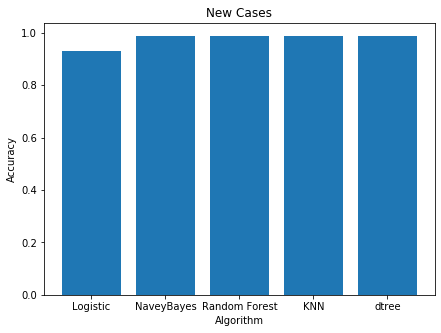

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
accrmseweather=[mlw,nbw,rfw,knw,dnw]
AlgorithmS=["Logistic","NaveyBayes","Random Forest","KNN","dtree"]
plt.bar(AlgorithmS,accrmseweather)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("New Cases")

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    #clf.fit(X_train, y_train)
model2=clf.fit(X_train, y_train)
   # model1.predict(new_observation)
y_pred = model2.predict(X_test)
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.9883720930232558

In [35]:
import pandas as pd
feature_importances=pd.DataFrame(clf.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [36]:
print(feature_importances)

                  importance
New Deaths          0.412831
Total Deaths        0.131992
Total Tests         0.104414
Total Recovered     0.100942
Total Cases         0.091823
Serious,Critical    0.080052
Active Cases        0.077945


In [37]:
df1['cs']=df['Total Deaths']
X=df1.drop(['Total Cases','Total Deaths','Active Cases','cs'],axis=1)

y=df1['cs']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [38]:
X_train

,New Cases,New Deaths,Total Recovered,"Serious,Critical",Total Tests
150,0,0,62,0,59
63,0,0,134,9,128
148,0,0,63,0,123
142,0,0,55,0,76
171,0,0,28,1,29
...,...,...,...,...,...
144,0,0,58,0,103
118,0,0,89,4,121
189,0,0,13,0,38
206,0,0,0,0,0


In [40]:
print("LOGISTIC ALGORITHM")
mlw=logisticalgo(X_train,y_train,"Total Deaths",[[730,402,1,23,0]])
print("NAIVYE BAYES  ALGORITHM")
nbw=nbs(X_train,y_train,"Total Deaths",[[730,402,1,23,0]])
print("RANDOM FOREST ALGORITHM")
rfw=randomforest(X_train,y_train,"Total Deaths",[[730,402,1,23,0]])
print("KNN ALGORITHM")
knw=knnalgo(X_train,y_train,"Total Deaths",[[730,402,1,23,0]])
print("DTREE")
dnw=dtree(X_train,y_train,"Total Deaths",[[730,402,1,23,0]])


LOGISTIC ALGORITHM
Total Deaths


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.



CONFUSION MATRIX
[[11  1  0 ...  0  0  0]
 [ 4  0  0 ...  0  0  0]
 [ 3  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.42      0.85      0.56        13
         1.0       0.00      0.00      0.00         5
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         2
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         2
        15.0    

CONFUSION MATRIX
[[10  0  0 ...  0  0  0]
 [ 3  0  1 ...  0  0  0]
 [ 2  1  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.56      0.77      0.65        13
         1.0       0.00      0.00      0.00         5
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         2
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         2
        15.0    

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sample

Text(0.5, 1.0, 'Total Deaths')

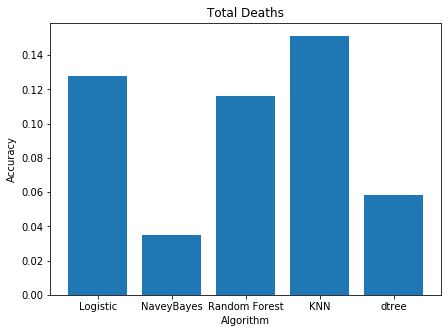

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
accweather=[mlw,nbw,rfw,knw,dnw]
AlgorithmS=["Logistic","NaveyBayes","Random Forest","KNN","dtree"]
plt.bar(AlgorithmS,accweather)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Total Deaths")